In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
import matplotlib.cm as cmx
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 

%matplotlib inline

## Read in the data

In [47]:
# read in the data
df = pd.read_csv("../Data/Hawaii_RegimesPredictors.txt", sep="\t", decimal=",")

In [52]:
# get summary statistics
df.describe()

,id_spatial,Long,Lat,Coral,CCA,Turf,Macro,Other,Grazers,Scrapers,...,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth,Regime,Regime1,Regime2,Regime3,Regime5
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,...,620.000000,620.000000,620.000000,507.000000,608.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,519.274194,-156.973185,20.728832,17.370766,6.111688,58.813531,7.276603,8.467413,15.814621,10.134796,...,9.001442,20.822663,0.115180,10.607766,9.561720,2.603226,0.275806,0.277419,0.230645,0.216129
std,294.974727,1.199391,0.813619,17.109478,6.080902,20.105815,9.787721,10.964297,25.898379,17.675988,...,0.814026,22.295760,0.066225,7.027207,6.149519,1.446065,0.447281,0.448087,0.421586,0.411936
min,4.000000,-160.250286,18.965413,0.000000,0.000000,12.313535,0.000000,0.000000,0.000000,0.000000,...,6.824600,0.886858,0.041487,0.000000,0.487680,1.000000,0.000000,0.000000,0.000000,0.000000
25%,272.500000,-157.801203,19.856367,3.137780,1.600000,43.247987,0.067343,1.000000,2.425361,0.047486,...,8.343100,6.154151,0.057143,5.048341,4.572000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,522.500000,-156.808687,20.907583,10.805405,4.389021,58.537204,3.491075,4.247239,7.624393,4.293422,...,9.263800,11.545006,0.091254,9.271130,8.794600,2.000000,0.000000,0.000000,0.000000,0.000000
75%,775.500000,-155.982067,21.269171,29.374330,8.800000,75.215385,10.860417,11.179449,17.728449,11.642033,...,9.515100,31.146552,0.166070,14.272170,13.100000,3.000000,1.000000,1.000000,0.000000,0.000000
max,1024.000000,-154.820645,22.235486,73.287671,39.687500,98.600000,60.000000,64.000000,268.077556,127.187391,...,11.714200,114.938387,0.503056,35.868209,30.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# take a look at the first 14 columns that weren't used in their boosted regression trees
df.iloc[0:5, 0:14]

,id_spatial,Long,Lat,Island,Coral,CCA,Turf,Macro,Other,Grazers,Scrapers,Browsers,Predators,Secondary
0,4,-157.307727,21.106717,Molokai,1.023891,1.706485,77.815700,18.088737,1.023891,1.324986,0.153250,0.163843,0.000000,3.393998
1,5,-157.304986,21.113497,Molokai,3.555556,1.333333,83.555556,9.777778,0.888889,0.890407,0.000000,0.248076,0.000000,2.872683
2,6,-157.303306,21.124814,Molokai,17.620555,6.348836,44.875760,25.716525,4.836712,4.628477,0.143309,5.420154,1.347466,2.238995
3,8,-157.299938,21.148297,Molokai,0.675676,1.351351,86.486487,0.337838,5.743243,0.069128,0.000000,0.000000,0.000000,3.341160
4,9,-157.300286,21.128897,Molokai,4.000000,3.111111,53.333333,17.333333,21.777778,11.775000,0.000000,1.655366,0.967914,8.411082


In [140]:
# other columns that weren't used in their boosted regression trees
df.iloc[0:5, 34:]

,Regime,Regime1,Regime2,Regime3,Regime5
0,1,1,0,0,0
1,1,1,0,0,0
2,2,0,1,0,0
3,1,1,0,0,0
4,2,0,1,0,0


In [109]:
# column s that were used in the boosted trees
df.iloc[0:5, 14:34]

,Effluent,Sedimentation,New_Development,Habitat_Modification,Invasive_Algae,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
0,0.0,0.075594,0.004250,0,0,0.013817,0.396614,5.622424,3.671531,0.373111,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,4.889608,2.8000
1,0.0,0.261318,0.004023,0,0,0.013817,0.386873,0.000000,0.000000,0.364839,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,3.793523,7.3152
2,0.0,0.381684,0.003573,0,0,0.013817,0.377407,0.000000,0.000000,0.309139,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,38.007866,0.084089,5.275938,11.5000
3,0.0,0.135392,0.000406,0,0,0.013817,0.353853,0.000000,0.000000,0.059943,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,39.139775,0.087039,2.511288,29.1000
4,0.0,0.577138,0.003794,0,0,0.013817,0.369782,0.000000,0.000000,0.342674,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,40.587803,0.084932,6.865359,10.0584


## Split into train and test

In [145]:
def data_prep(df):
    df = df.astype({"id_spatial": "category", "Island": "category", "Habitat_Modification": "category", 
               "Invasive_Algae": "category", "Regime": "category", "Regime1": "category", 
               "Regime2": "category", "Regime3": "category", "Regime5": "category"})
    return df

In [199]:
df = data_prep(df)

In [203]:
df.dropna().shape

(498, 39)

In [204]:
train, test = train_test_split(df.dropna(), test_size=0.2, random_state = 47)

In [205]:
print(df.dropna().shape)
print(train.shape)
print(test.shape)

assert(train.shape[0] + test.shape[0] == df.dropna().shape[0])

(498, 39)
(398, 39)
(100, 39)


## Explore the data set

In [214]:
# look at how many NAs exist in the data set
df.apply(lambda x : x.isna().sum())

id_spatial                       0
Long                             0
Lat                              0
Island                           0
Coral                            0
CCA                              0
Turf                             0
Macro                            0
Other                            0
Grazers                          0
Scrapers                         0
Browsers                         0
Predators                        0
Secondary                        0
Effluent                         0
Sedimentation                    0
New_Development                  0
Habitat_Modification             0
Invasive_Algae                   0
Fishing_Comm_Total               0
Fishing_NonComm_Boat_Total       0
Fishing_NonComm_Shore_Line       0
Fishing_NonComm_Shore_Net        0
Fishing_NonComm_Shore_Spear      0
SST_CLIM_M                       0
SST_STD                          0
CHL_CLIM_M                       0
CHL_ANOM_F                       0
PAR_CLIM_M          

### Look at the distribution of the labels between the train & test groups

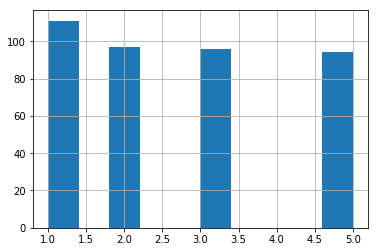

In [207]:
# look at the distribution of regimes
train['Regime'].hist()

In [208]:
train.groupby(['Regime']).size().reset_index(name='Counts')

,Regime,Counts
0,1,111
1,2,97
2,3,96
3,5,94


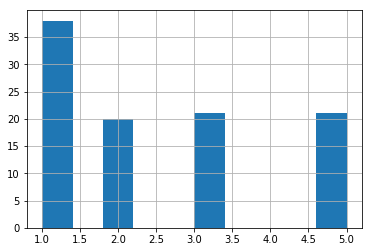

In [209]:
# look at the distribution of regimes
test['Regime'].hist()

In [210]:
test.groupby(['Regime']).size().reset_index(name='Counts')

,Regime,Counts
0,1,38
1,2,20
2,3,21
3,5,21


### Look at correlations between the features

In [122]:
df.iloc[:, 14:34].describe()

,Effluent,Sedimentation,New_Development,Habitat_Modification,Invasive_Algae,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,507.000000,608.000000
mean,3827.363948,6.905912,0.025509,0.083871,0.212903,0.229942,0.526341,6.365645,0.948522,2.370396,27.196995,0.919022,0.102248,0.090316,52.406900,9.001442,20.822663,0.115180,10.607766,9.561720
std,8556.137170,18.743726,0.040390,0.277418,0.409690,0.435801,0.747922,9.469403,1.465142,2.601515,0.409368,0.065704,0.035152,0.052660,4.278262,0.814026,22.295760,0.066225,7.027207,6.149519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.170000,0.801192,0.056300,0.002000,36.231602,6.824600,0.886858,0.041487,0.000000,0.487680
25%,0.000000,0.000000,0.001873,0.000000,0.000000,0.013817,0.121030,0.000000,0.000000,0.144102,26.878000,0.875097,0.083300,0.051400,52.215550,8.343100,6.154151,0.057143,5.048341,4.572000
50%,481.001648,0.000555,0.005849,0.000000,0.000000,0.066593,0.301010,0.000000,0.000000,1.794678,27.374000,0.915251,0.091600,0.088900,54.064400,9.263800,11.545006,0.091254,9.271130,8.794600
75%,3421.725342,4.482476,0.032122,0.000000,0.000000,0.177509,0.508434,11.745987,1.806736,3.963960,27.469000,0.946601,0.115400,0.134900,54.796200,9.515100,31.146552,0.166070,14.272170,13.100000
max,88142.132810,171.111557,0.376183,1.000000,1.000000,2.060731,3.109559,29.123327,5.428471,7.422137,28.291000,1.157028,0.409100,0.235178,56.416500,11.714200,114.938387,0.503056,35.868209,30.000000


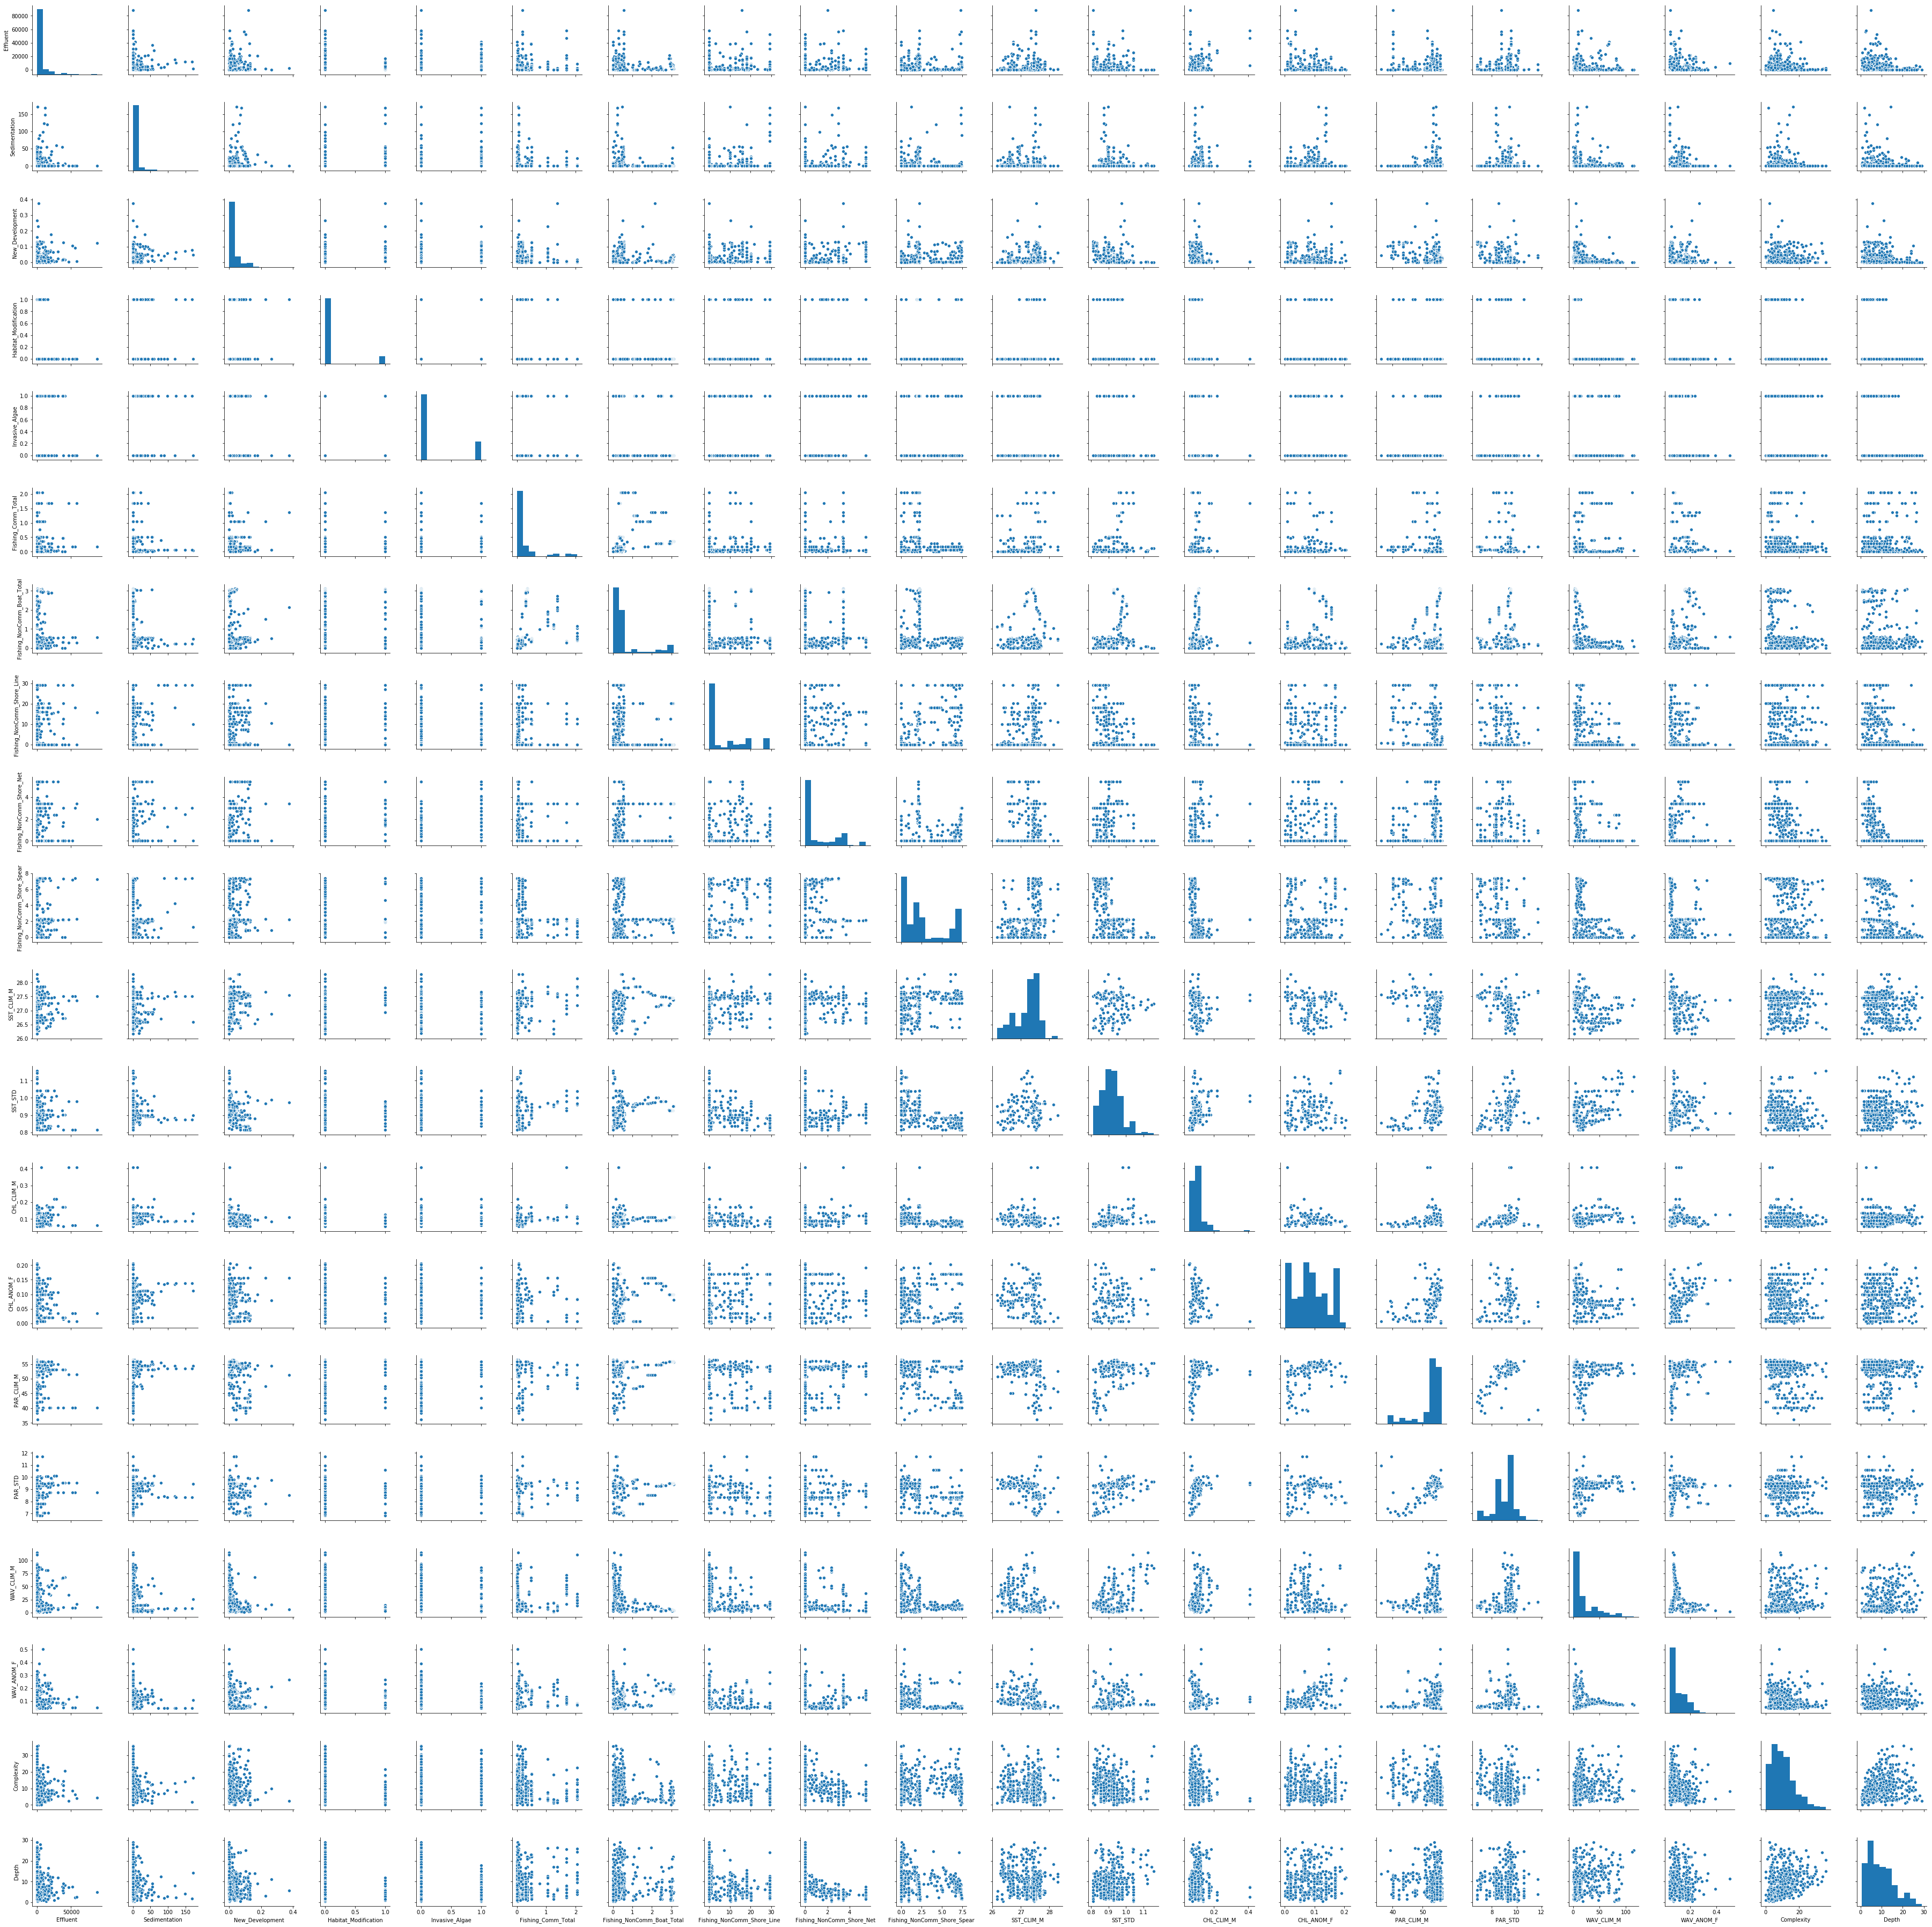

In [215]:
sns.pairplot(df.iloc[:, 14:34].dropna())

In [165]:
#no_comp = df.iloc[:, 14:34]
#no_comp = no_comp.drop(columns=['Complexity'])
#no_comp.head()

In [113]:
def plot_corr(df, size=9):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

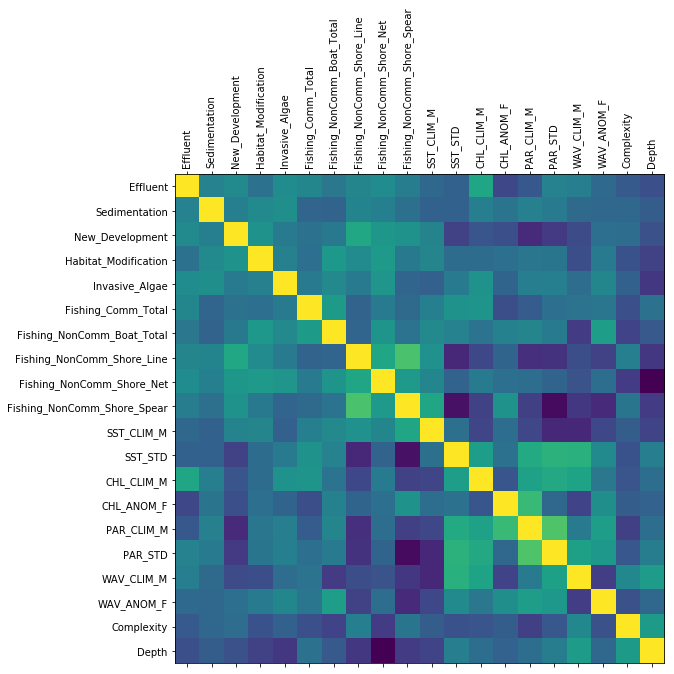

In [114]:
plot_corr(df.iloc[:,14:34])

In [112]:
corr = df.iloc[:,14:34].corr()
corr.style.background_gradient(cmap='coolwarm')

,Effluent,Sedimentation,New_Development,Habitat_Modification,Invasive_Algae,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
Effluent,1,0.123824,0.1763,0.0163949,0.188967,0.146834,0.0482753,0.142841,0.188844,0.0869636,-0.0500867,-0.085605,0.353968,-0.234753,-0.141012,0.120926,0.0997777,-0.0350542,-0.131372,-0.18988
Sedimentation,0.123824,1,0.106301,0.178625,0.210998,-0.0620359,-0.0718031,0.13528,0.104147,0.00423883,-0.0898196,-0.0866881,0.0981496,0.0284759,0.110675,0.0716965,-0.0341368,-0.0436234,-0.0524355,-0.109664
New_Development,0.1763,0.106301,1,0.23045,0.0755971,0.0112916,0.0612866,0.361021,0.258296,0.224318,0.128019,-0.271311,-0.16096,-0.190933,-0.382195,-0.308501,-0.213856,-0.00244791,-0.0145792,-0.184141
Habitat_Modification,0.0163949,0.178625,0.23045,1,0.112704,-0.00147682,0.262805,0.183762,0.278711,0.0617078,0.141326,-0.0193254,-0.0192902,-0.00332778,0.0408644,0.0368537,-0.198062,0.0682938,-0.178442,-0.268278
Invasive_Algae,0.188967,0.210998,0.0755971,0.112704,1,0.0712599,0.168015,0.0742482,0.244856,-0.0621549,-0.0954108,0.071728,0.228607,-0.0711442,0.096875,0.103984,-0.0110805,0.144023,-0.0889102,-0.321034
Fishing_Comm_Total,0.146834,-0.0620359,0.0112916,-0.00147682,0.0712599,1,0.283251,-0.075322,0.070761,-0.0341475,0.102461,0.226274,0.241092,-0.198958,-0.115221,-0.00248638,0.0234577,0.0392839,-0.190783,0.0192197
Fishing_NonComm_Boat_Total,0.0482753,-0.0718031,0.0612866,0.262805,0.168015,0.283251,1,-0.0637713,0.238035,0.0247162,0.162781,0.124855,0.0223223,0.117599,0.143229,0.08207,-0.300223,0.303167,-0.256801,-0.135469
Fishing_NonComm_Shore_Line,0.142841,0.13528,0.361021,0.183762,0.0742482,-0.075322,-0.0637713,1,0.356692,0.548215,0.217731,-0.394035,-0.233958,-0.0664744,-0.365175,-0.346015,-0.198744,-0.272203,0.104356,-0.319252
Fishing_NonComm_Shore_Net,0.188844,0.104147,0.258296,0.278711,0.244856,0.070761,0.238035,0.356692,1,0.267529,0.144256,-0.0724804,0.0698112,-0.00249775,-0.00643345,-0.069331,-0.171075,-0.00608794,-0.302642,-0.57689
Fishing_NonComm_Shore_Spear,0.0869636,0.00423883,0.224318,0.0617078,-0.0621549,-0.0341475,0.0247162,0.548215,0.267529,1,0.351551,-0.502036,-0.271722,0.2239,-0.281076,-0.531954,-0.319118,-0.387646,0.0335897,-0.2962


### Look at the distribution of test and train observations across islands

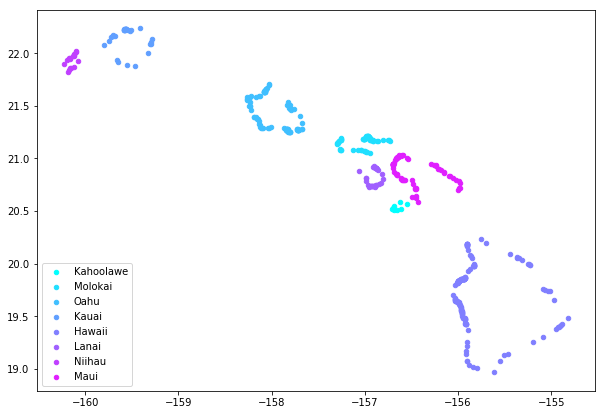

In [137]:
# Unique names of islands
uniq = list(set(train.Island))

# Set the color map to match the number of islands
z = range(1, len(uniq))
hot = plt.get_cmap('cool')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

x = train.Long
y = train.Lat

plt.figure(figsize=(10,7))
# Plot each island
for i in range(len(uniq)):
    indx = train['Island'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=20, color=scalarMap.to_rgba(i), label=uniq[i])

plt.legend(loc='lower left')
plt.show()

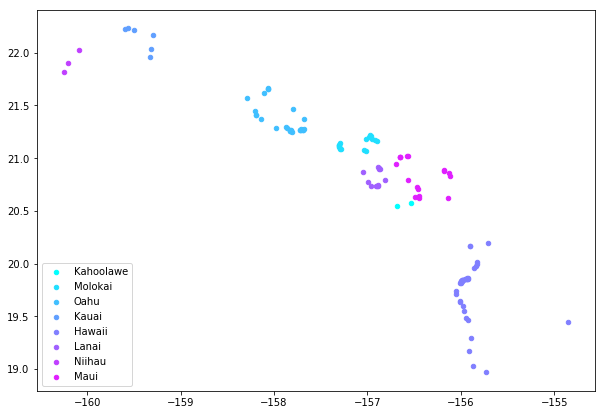

In [138]:
plt.figure(figsize=(10,7))
# Plot each island
for i in range(len(uniq)):
    indx = test['Island'] == uniq[i]
    plt.scatter(test.Long[indx], test.Lat[indx], s=20, color=scalarMap.to_rgba(i), label=uniq[i])

plt.legend(loc='lower left')
plt.show()

### Assess collinearity with Variable Inflation Factor

In [188]:
# isolate the predictor columns
pred = df.iloc[:, 14:34]

# add constant in the matrix of explanatory variable (required by the function)
pred_const = add_constant(pred.dropna())

In [189]:
# output the variable inflation factors
pd.Series([variance_inflation_factor(pred_const.values, i) 
               for i in range(pred_const.shape[1])], 
              index=X.columns) #.sort_values(ascending=False)

const                          9579.884603
Effluent                          1.646041
Sedimentation                     1.247004
New_Development                   1.481717
Habitat_Modification              1.322993
Invasive_Algae                    1.315029
Fishing_Comm_Total                1.489033
Fishing_NonComm_Boat_Total        1.644938
Fishing_NonComm_Shore_Line        1.861416
Fishing_NonComm_Shore_Net         1.818764
Fishing_NonComm_Shore_Spear       2.969375
SST_CLIM_M                        2.260407
SST_STD                           3.084574
CHL_CLIM_M                        1.982881
CHL_ANOM_F                        2.400019
PAR_CLIM_M                        3.281969
PAR_STD                           2.429096
WAV_CLIM_M                        2.942806
WAV_ANOM_F                        2.204945
Complexity                        1.418140
Depth                             2.098165
dtype: float64

## Logistic Regression

##### Split data into train and test set

In [276]:
# isolate the predictors and labels for both the training and test set
train_X = train.iloc[:, 14:34]
train_y = train['Regime']

test_X = test.iloc[:, 14:34]
test_y = test['Regime']

##### Standardize the data

In [331]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_X)

# Apply transform to both the training set and the test set.
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

### Multiclass logistic regression model (one vs. rest)

##### Fit the model & make predictions

In [335]:
clf = LogisticRegression()
clf.fit(train_X, train_y)
#clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial').fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [336]:
# make predictions
test_pred = clf.predict(test_X)

##### Evaluate performance

In [357]:
def evaluate_performance(test_y, test_pred):
    cnf_matrix = metrics.confusion_matrix(test_y, test_pred)
    
    class_names=['Reg 1', 'Reg 2', 'Reg 3', 'Reg 5']
    cnf_matrix = pd.DataFrame(cnf_matrix, index = class_names,
                  columns = class_names)
    
    # plot confusion matrix with heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    count_misclassified = (test_y != test_pred).sum()
    print('Misclassified samples: {}'.format(count_misclassified))
    accuracy = metrics.accuracy_score(test_y, test_pred)
    print('Accuracy: {:.2f} \n'.format(accuracy))
    
    print('Classification Report:')
    print(metrics.classification_report(test_y, test_pred))  
    

Misclassified samples: 35
Accuracy: 0.65 

Classification Report:
             precision    recall  f1-score   support

          1       0.76      0.76      0.76        38
          2       0.62      0.65      0.63        20
          3       0.56      0.71      0.63        21
          5       0.57      0.38      0.46        21

avg / total       0.65      0.65      0.64       100



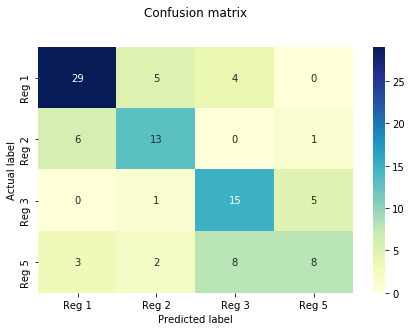

In [358]:
evaluate_performance(test_y, test_pred)

### Multiclass logistic regression model (multinomial)

##### Fit the model & make predictions

In [339]:
clf_multi = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf_multi.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [340]:
# make predictions
test_pred_multi = clf_multi.predict(test_X)

##### Evaluate performance

Misclassified samples: 36
Accuracy: 0.64 

Classification Report:
             precision    recall  f1-score   support

          1       0.74      0.74      0.74        38
          2       0.62      0.65      0.63        20
          3       0.54      0.67      0.60        21
          5       0.60      0.43      0.50        21

avg / total       0.64      0.64      0.64       100



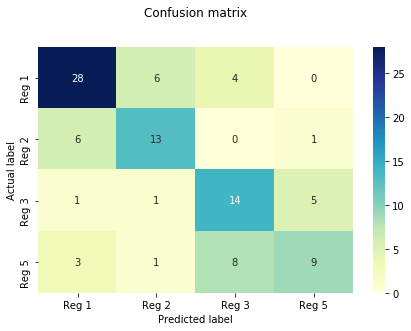

In [359]:
evaluate_performance(test_y, test_pred_multi)

## Support Vector Machines (SVMs)

### Use a Gaussian Kernel

##### Fit the model & make predictions

In [343]:
svclassifier_gauss = SVC(kernel='rbf')  
svclassifier_gauss.fit(train_X, train_y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [344]:
test_pred_svm_gauss = svclassifier_gauss.predict(test_X)  

##### evaluate the performance of the model

Misclassified samples: 27
Accuracy: 0.73 

Classification Report:
             precision    recall  f1-score   support

          1       0.80      0.84      0.82        38
          2       0.82      0.70      0.76        20
          3       0.62      0.86      0.72        21
          5       0.64      0.43      0.51        21

avg / total       0.73      0.73      0.72       100



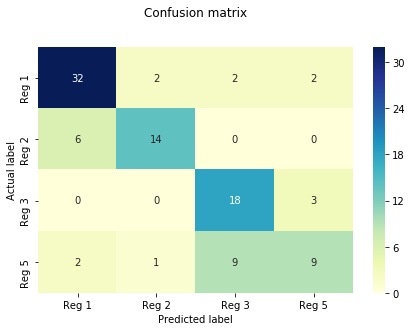

In [360]:
evaluate_performance(test_y, test_pred_svm_gauss)

### Use a Polynomial Kernel

In [374]:
svclassifier_poly = SVC(kernel='poly')  
svclassifier_poly.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [377]:
test_pred_svm_poly = svclassifier_poly.predict(test_X)  

Misclassified samples: 33
Accuracy: 0.67 

Classification Report:
             precision    recall  f1-score   support

          1       0.77      0.71      0.74        38
          2       0.68      0.65      0.67        20
          3       0.53      0.86      0.65        21
          5       0.75      0.43      0.55        21

avg / total       0.70      0.67      0.67       100



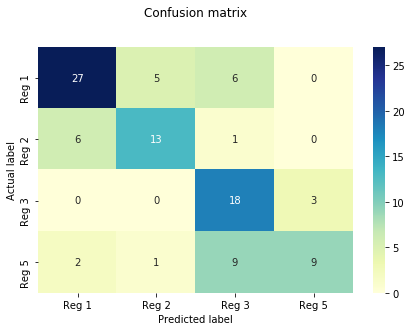

In [378]:
evaluate_performance(test_y, test_pred_svm_poly)